In [3]:
import numpy as np
import scipy.stats as stats
import random

# Menghasilkan 100 pengamatan acak dengan rentang nilai 11 hingga 20
def jacknife():
  x = [random.randint(11, 20) for y in range(100)]
  mean_lengths, n = [], len(x)
  index = np.arange(n)

  for z in range(n):
      jk_sample = np.delete(x, z)
      mean_lengths.append(np.mean(jk_sample))

  mean_lengths = np.array(mean_lengths)
  jk_mean_lengths = np.mean(mean_lengths)

  jk_var = (n-1)*np.var(mean_lengths)
  jk_lower_ci = jk_mean_lengths - 1.96 * np.sqrt(jk_var)
  jk_upper_ci = jk_mean_lengths + 1.96 * np.sqrt(jk_var)

  print('jk_mean adalah', jk_mean_lengths)
  print("Jacknife 95% CI lower = {}, upper = {}".format(jk_lower_ci, jk_upper_ci))

jacknife()

jk_mean adalah 15.72
Jacknife 95% CI lower = 15.176172017689936, upper = 16.263827982310065


[1.50561556 1.900512   3.59427519 6.46209128 2.61646964 1.92151832
 1.55494793 1.80290131 2.87940891 4.91198552 2.06685558 2.3615876
 1.68179595 2.94139387 2.03088758 4.06937532 3.98293423 2.72720837
 3.64951745 2.76817565 3.52233101 1.79912618 2.48775426 2.86925652
 3.49648789 1.51091085 1.26868956 1.73263173 2.97714788 2.62732405
 6.73266728 1.20891915 4.51188148 1.80323284 1.98751934 1.89653432
 2.06438881 3.48321389 3.95529521 3.28580679 2.85835576 1.71748375
 2.05882493 1.22943534 2.0979612  2.5000387  2.63471055 3.0622894
 2.24476377 2.79434795 1.19538965 1.13281313 1.86384417 1.89381441
 2.2438592  2.07406222 3.42920619 1.24539905 3.85856032 2.22010366
 1.51793781 3.83984342 2.24966256 1.44098027 3.25641556 1.63926916
 1.41538667 2.0116497  2.745262   3.33328944 2.48268059 1.29759317
 2.30448188 2.08107813 1.48317883 2.02703401 1.96466422 2.8755698
 2.98283644 2.19220353 2.02808225 3.49576058 1.31582516 1.45043983
 2.51743313 3.64202497 1.7259018  1.81812963 2.91333813 1.0582152

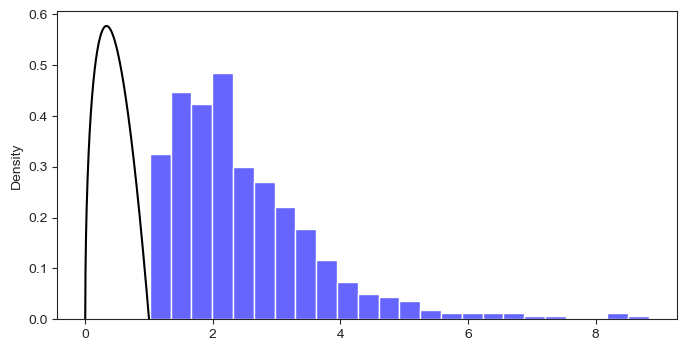

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.special import gamma

def pdf_gamma(x, alpha, beta):
  return(gamma(alpha+beta) / (gamma(alpha) * gamma(beta))) * x**(alpha-1) * (1-x) * (1-x)**(beta-1)

def pdf_proposal(x):
  return stats.uniform.pdf(x)

def inverse_cdf_gamma(u, alpha, beta):
  return stats.gamma.ppf(u, alpha, beta)

alpha = 1.5
beta = 1
n = 500

u = np.random.uniform(size=n)
rand_data = inverse_cdf_gamma(u, alpha, beta)

print(rand_data)


plt.figure(figsize=(8, 4))
sns.set_style("ticks")

sns.histplot(data=rand_data, stat='density', color='blue', alpha=0.6)

x = np.linspace(0, 1, 500)
y = pdf_gamma(x, alpha, beta)
sns.lineplot(x=x, y=y, color='black')

plt.show()

In [9]:
import numpy as np
import scipy.stats as stats
import random

# Menghasilkan 100 pengamatan acak dengan rentang nilai 11 hingga 20
def jacknife():
  x = [random.randint(11, 20) for _ in range(100)]
  mean_lengths, n = [], len(x)
  index = np.arange(n)

  for i in range(n):
      jk_sample = np.delete(x, i)
      mean_lengths.append(np.mean(jk_sample))

  mean_lengths = np.array(mean_lengths)
  jk_mean_lengths = np.mean(mean_lengths)

  jk_var = (n-1)*np.var(mean_lengths)
  jk_lower_ci = jk_mean_lengths - 1.96 * np.sqrt(jk_var)
  jk_upper_ci = jk_mean_lengths + 1.96 * np.sqrt(jk_var)

  print('jk_mean adalah', jk_mean_lengths)
  print("Jacknife 95% CI lower = {}, upper = {}".format(jk_lower_ci, jk_upper_ci))

jacknife()

jk_mean adalah 15.6
Jacknife 95% CI lower = 14.983961433714157, upper = 16.216038566285842


In [11]:
import numpy as np

def median_bootstrap(data, iterations, confidence_level):
    n = len(data)
    medians = []

    for y in range(iterations):
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        median = np.median(bootstrap_sample)
        medians.append(median)

    lower_percentile = (1 - confidence_level) / 2
    upper_percentile = 1 - lower_percentile
    lower_bound = np.percentile(medians, lower_percentile * 100)
    upper_bound = np.percentile(medians, upper_percentile * 100)

    return lower_bound, upper_bound

# Simulasi data
np.random.seed(123)  # Untuk hasil yang dapat direproduksi
sample_data = np.random.randint(1, 11, size=50)

# Parameter
bootstrap_iterations = 500
confidence_level = 0.95

# Menjalankan algoritma median bootstrap
lower_bound, upper_bound = median_bootstrap(sample_data, bootstrap_iterations, confidence_level)

# Menampilkan hasil
print("Selang kepercayaan 95% untuk median:")
print("Batas bawah:", lower_bound)
print("Batas atas:", upper_bound)

Selang kepercayaan 95% untuk median:
Batas bawah: 3.0
Batas atas: 5.0
